## Lab 4 Report

AJ Chau, Justin Kim, Khoa Tran

## Summary

In this lab, we implemented Python functions to read and compare the different signals. We also created functions to decode a transmitted signal in a CSV file.

In [19]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy.io import wavfile as wav
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Assignment 1: Matched Filter with Ideal Signals

<IPython.core.display.Javascript object>


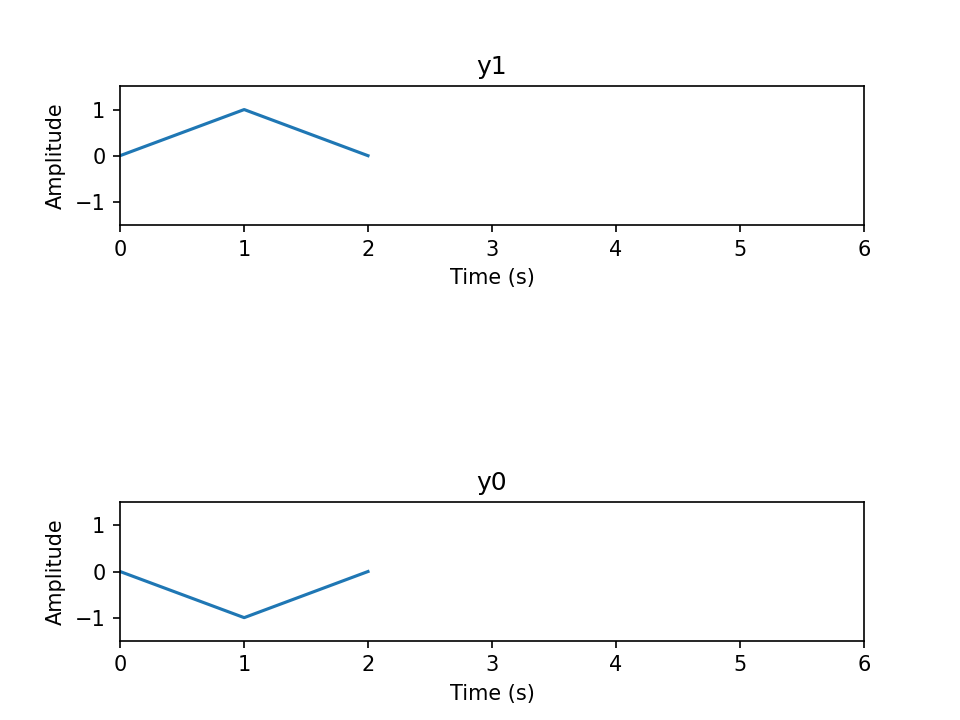

y1_corr  1.0
y0_corr  -1.0


In [20]:
# Part A


fs = 8000
t = np.arange(0, 1 + 1/fs, 1/fs)

def u(t):
    return 1.0 * (t>0)

def s1(t):
    return u(t) - u(t-1)

s1 = s1(t)
s0 = -s1


# Part B
y1 = np.convolve(s1, s1)/fs
y0 = np.convolve(s1, s0)/fs

# Part C

t_y1 = np.arange(0, len(y1)/fs, 1/fs)
t_y0 = np.arange(0, len(y0)/fs, 1/fs)

fig,ax = plt.subplots(2,1)
fig.subplots_adjust(hspace =2, wspace = 0)

# top subplot
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time (s)')
ax[0].set_xlim(0,6)
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_title('y1')
ax[0].plot(t_y1, y1)

# bottom subplot
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim(0,6)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_title('y0')
ax[1].plot(t_y0, y0)


# Part D
y1_corr = y1[len(s1)]
y0_corr = y0[len(s0)]

print('y1_corr ', y1_corr)
print('y0_corr ', y0_corr)

## Discussion

Due to the communitive property of convolution, they must result in the same convolution regardless of the order because it doesn't matter which signal is moved over the other, the property allows for the resulting convolution will always remain the same.

## Assignment 2: Signal Decoding with a Matched Filter

<IPython.core.display.Javascript object>


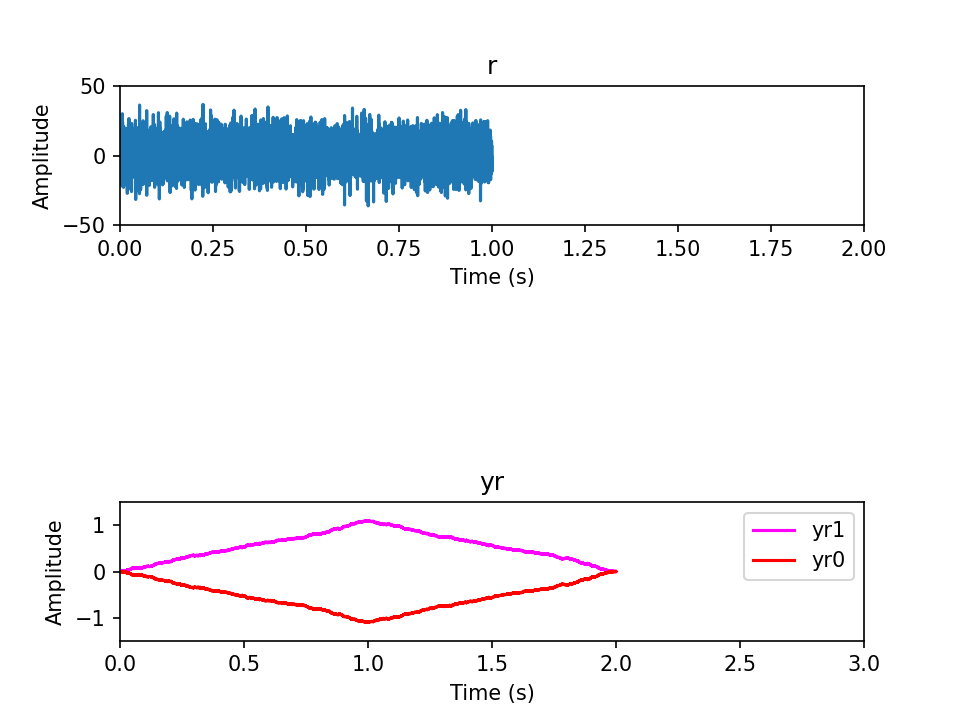

yr1_corr  1.0950606028973486
yr0_corr  -1.0950606028973486
decoding n + s1 result:  1
decoding n + s0 result:  0


In [21]:
def decode(r, fs, s0, s1): 
    y0 = np.convolve(r, s0)/fs
    y1 = np.convolve(r, s1)/fs
    midpoint = len(r)
    y0_corr = y0[midpoint]
    y1_corr = y1[midpoint]
    
    if y1_corr > y0_corr:
        return 1
    return 0


# Part B
n = np.random.normal(0,10,len(s1))
r = s1 + n # noisy s1
t_r = np.arange(0, len(r)/fs, 1/fs)

fig,ax = plt.subplots(2,1)
fig.subplots_adjust(hspace =2, wspace = 0)

# top subplot
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time (s)')
ax[0].set_xlim(0,2)
ax[0].set_ylim(-50, 50)
ax[0].set_title('r')
ax[0].plot(t_r, r)

# Part C

yr1 = np.convolve(r, s1)/fs
yr0 = np.convolve(r, s0)/fs

t_yr = np.arange(0, len(yr1)/fs, 1/fs)


# bottom subplot
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim(0,3)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_title('yr')
ax[1].plot(t_yr, yr1, 'magenta')
ax[1].plot(t_yr, yr0, 'r')
ax[1].legend(('yr1', 'yr0'), loc='upper right')

yr1_corr = yr1[len(r)]
yr0_corr = yr0[len(r)]

print('yr1_corr ', yr1_corr)
print('yr0_corr ', yr0_corr)


# Part D
print('decoding n + s1 result: ', decode(r, fs, s0, s1))

r = n + s0
print('decoding n + s0 result: ', decode(r, fs, s0, s1))

## Discussion
We believe that there would be a lower correlation coefficient with the new s0(t) because the original s0(t) is better for communication as it has the same shape as s1. With this new s0(t), it is not as similar to a potential input signal compared to the box signals. As a result, we believe that there will be a lower correlation.

## Assignment 3: Decipher Received Message

In [18]:
#Part A

#reading CSV
file = open('receivedmsg.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')

#Part B
rm_rows = len(rm)
message_bits = np.zeros(rm_rows)


#Part C
for i in range(rm_rows):
    message_bits[i] = decode(rm[i], fs, s0, s1)
    
print(message_bits.astype('int'))

[0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 0 0 0 1]


## Discussion

Go Huskies!